In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [2]:
ds=pd.read_csv('/Users/raghavxt/Downloads/GlobalMobileAppsExercise.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25124 entries, 0 to 25123
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   device                   25124 non-null  object 
 1   t_day                    25124 non-null  int64  
 2   crawl_date               25124 non-null  object 
 3   rank                     25124 non-null  int64  
 4   app_store                25124 non-null  object 
 5   region                   25124 non-null  object 
 6   release_date             25124 non-null  object 
 7   app_age_current_version  25124 non-null  int64  
 8   developer                25124 non-null  object 
 9   app_type                 25124 non-null  object 
 10  price                    25124 non-null  float64
 11  filesize                 25124 non-null  float64
 12  num_screenshot           25124 non-null  int64  
 13  rating_count             25124 non-null  int64  
 14  average_rating        

In [3]:
df = ds.drop(['device','crawl_date','app_store','region','release_date','developer','app_type','category','in_app_ads','in_app_purchase'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25124 entries, 0 to 25123
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   t_day                    25124 non-null  int64  
 1   rank                     25124 non-null  int64  
 2   app_age_current_version  25124 non-null  int64  
 3   price                    25124 non-null  float64
 4   filesize                 25124 non-null  float64
 5   num_screenshot           25124 non-null  int64  
 6   rating_count             25124 non-null  int64  
 7   average_rating           25124 non-null  float64
 8   deviceindex              25124 non-null  int64  
 9   appstoreindex            25124 non-null  int64  
 10  rindex                   25124 non-null  int64  
 11  inapp_addummy            25124 non-null  int64  
 12  inapp_purchasedummy      25124 non-null  int64  
 13  categoryindex            25124 non-null  int64  
 14  apptypeindex          

<ipython-input-4-1a29b9b88d23>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)
<ipython-input-4-1a29b9b88d23>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names)


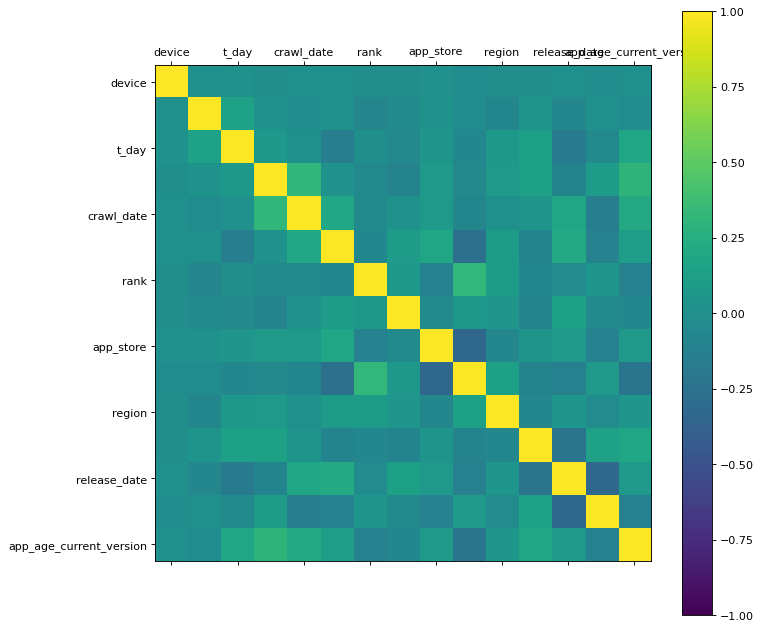

,t_day,rank,app_age_current_version,price,filesize,num_screenshot,rating_count,average_rating,deviceindex,appstoreindex,rindex,inapp_addummy,inapp_purchasedummy,categoryindex,apptypeindex
t_day,1.000000,0.005055,0.016329,-0.001101,0.001748,0.003090,-0.005544,-0.008326,0.009618,-0.025994,-0.012138,-0.004351,0.000484,-0.019579,0.007463
rank,0.005055,1.000000,0.142571,0.020896,-0.030430,0.001626,-0.089717,-0.051681,0.016051,-0.027049,-0.081024,0.034757,-0.070353,0.004737,-0.023869
app_age_current_version,0.016329,0.142571,1.000000,0.064663,0.001788,-0.141887,-0.006854,-0.060834,0.044732,-0.064610,0.070021,0.125879,-0.177658,-0.052284,0.184828
price,-0.001101,0.020896,0.064663,1.000000,0.314062,0.028513,-0.054182,-0.106697,0.075718,-0.060731,0.072743,0.140294,-0.093984,0.095196,0.299528
filesize,0.001748,-0.030430,0.001788,0.314062,1.000000,0.196948,-0.046046,0.030552,0.085554,-0.084658,0.000698,0.032809,0.179799,-0.143242,0.205683
num_screenshot,0.003090,0.001626,-0.141887,0.028513,0.196948,1.000000,-0.068862,0.102925,0.173067,-0.264395,0.089320,-0.096710,0.224083,-0.114550,0.113953
rating_count,-0.005544,-0.089717,-0.006854,-0.054182,-0.046046,-0.068862,1.000000,0.063855,-0.113319,0.324571,0.087985,-0.070510,-0.035277,0.054623,-0.125000
average_rating,-0.008326,-0.051681,-0.060834,-0.106697,0.030552,0.102925,0.063855,1.000000,-0.050149,0.064803,0.042463,-0.100951,0.136703,-0.050380,-0.063757
deviceindex,0.009618,0.016051,0.044732,0.075718,0.085554,0.173067,-0.113319,-0.050149,1.000000,-0.334791,-0.077333,0.031779,0.075336,-0.110241,0.077419
appstoreindex,-0.025994,-0.027049,-0.064610,-0.060731,-0.084658,-0.264395,0.324571,0.064803,-0.334791,1.000000,0.138569,-0.108746,-0.130962,0.081053,-0.220610


In [4]:
correlations = df.corr()
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(ds)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

In [5]:
y = df.iloc[:, 1].values
dg = df.loc[:, df.columns != 'rank']
dg

,t_day,app_age_current_version,price,filesize,num_screenshot,rating_count,average_rating,deviceindex,appstoreindex,rindex,inapp_addummy,inapp_purchasedummy,categoryindex,apptypeindex
0,113,113,0.00,20.2,4,41,4.0,2,2,1,3,2,8,1
1,113,99,0.00,22.0,5,46,4.0,2,2,1,3,2,8,1
2,113,50,0.00,30.2,10,1999,4.5,2,2,1,3,3,8,1
3,113,44,0.00,16.2,5,156,4.0,2,2,1,3,3,8,1
4,113,90,0.00,84.4,10,1740,4.5,1,2,1,2,3,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25119,114,87,99.99,27.5,5,0,0.0,2,2,2,3,2,17,2
25120,115,88,99.99,27.5,5,0,0.0,2,2,2,3,2,17,2
25121,116,89,99.99,27.5,5,0,0.0,2,2,2,3,2,17,2
25122,117,90,99.99,27.5,5,0,0.0,2,2,2,3,2,17,2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(dg, y, test_size=0.3)

Coefficients:  [-5.89686516e-02  1.48961980e-01  9.39183728e-01 -1.75216140e-02
  2.45816453e+00 -9.09392883e-05 -4.64264443e+00  2.69155975e-02
  9.54688898e+00 -2.16282175e+01  1.07861227e+00 -7.56225973e+00
 -1.14725426e-01 -8.13143436e+00]
Variance score: 0.045383945214657606


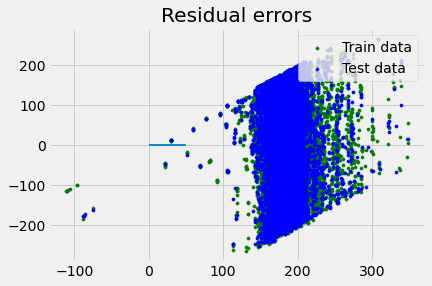

In [7]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Feature: 0, Score: 0.00848
Feature: 1, Score: 0.07138
Feature: 2, Score: 0.07078
Feature: 3, Score: 0.06983
Feature: 4, Score: 0.08311
Feature: 5, Score: 0.07203
Feature: 6, Score: 0.06995
Feature: 7, Score: 0.04263
Feature: 8, Score: 0.17938
Feature: 9, Score: 0.06406
Feature: 10, Score: 0.05996
Feature: 11, Score: 0.05136
Feature: 12, Score: 0.07852
Feature: 13, Score: 0.07853


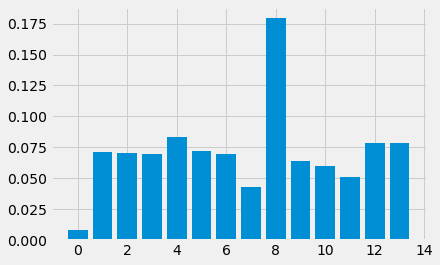

In [11]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [17]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.006500397983550013
